In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
df = pd.read_csv("dataset.csv")

symptom_cols = [col for col in df.columns if col.lower().startswith("symptom")]

all_symptoms = sorted(set(
    s.strip().replace(" ", "_").lower()
    for col in symptom_cols
    for s in df[col].dropna().unique()
))

for symptom in all_symptoms:
    df[symptom] = df[symptom_cols].apply(
        lambda row: int(symptom in [str(x).strip().replace(" ", "_").lower() for x in row if pd.notna(x)]),
        axis=1
    )

X = df[all_symptoms]
y = df["Disease"]

joblib.dump(all_symptoms, "all_symptoms.pkl")

/var/folders/56/drn2hcg966sb2nm292tw2gd00000gn/T/ipykernel_23472/3986586733.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symptom] = df[symptom_cols].apply(
/var/folders/56/drn2hcg966sb2nm292tw2gd00000gn/T/ipykernel_23472/3986586733.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symptom] = df[symptom_cols].apply(
/var/folders/56/drn2hcg966sb2nm292tw2gd00000gn/T/ipykernel_23472/3986586733.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

['all_symptoms.pkl']

In [31]:
print(df[all_symptoms])

      abdominal_pain  abnormal_menstruation  acidity  acute_liver_failure  \
0                  0                      0        0                    0   
1                  0                      0        0                    0   
2                  0                      0        0                    0   
3                  0                      0        0                    0   
4                  0                      0        0                    0   
...              ...                    ...      ...                  ...   
4915               0                      0        0                    0   
4916               0                      0        0                    0   
4917               0                      0        0                    0   
4918               0                      0        0                    0   
4919               0                      0        0                    0   

      altered_sensorium  anxiety  back_pain  belly_pain  blackheads  \
0   

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "rf_structured.pkl")

joblib.dump(list(model.classes_), "class_names.pkl")

y_pred_rf = model.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc:.2f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=model.classes_))

Random Forest Accuracy: 1.00

Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        30
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        30
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        30
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        30
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00    

/var/folders/56/drn2hcg966sb2nm292tw2gd00000gn/T/ipykernel_23472/2186942748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


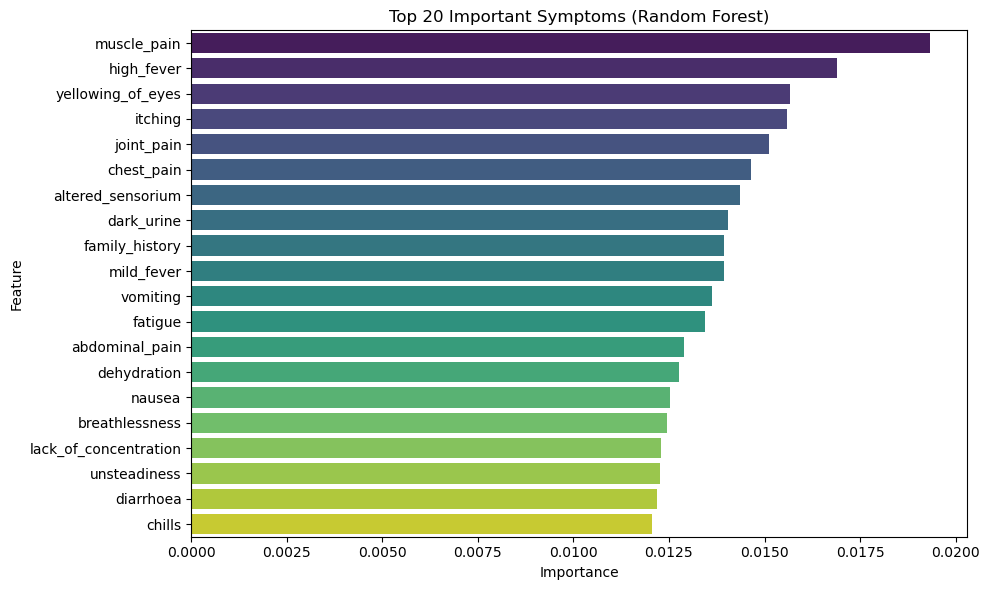

In [15]:
importances = model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Top 20 Important Symptoms (Random Forest)")
plt.tight_layout()
plt.show()

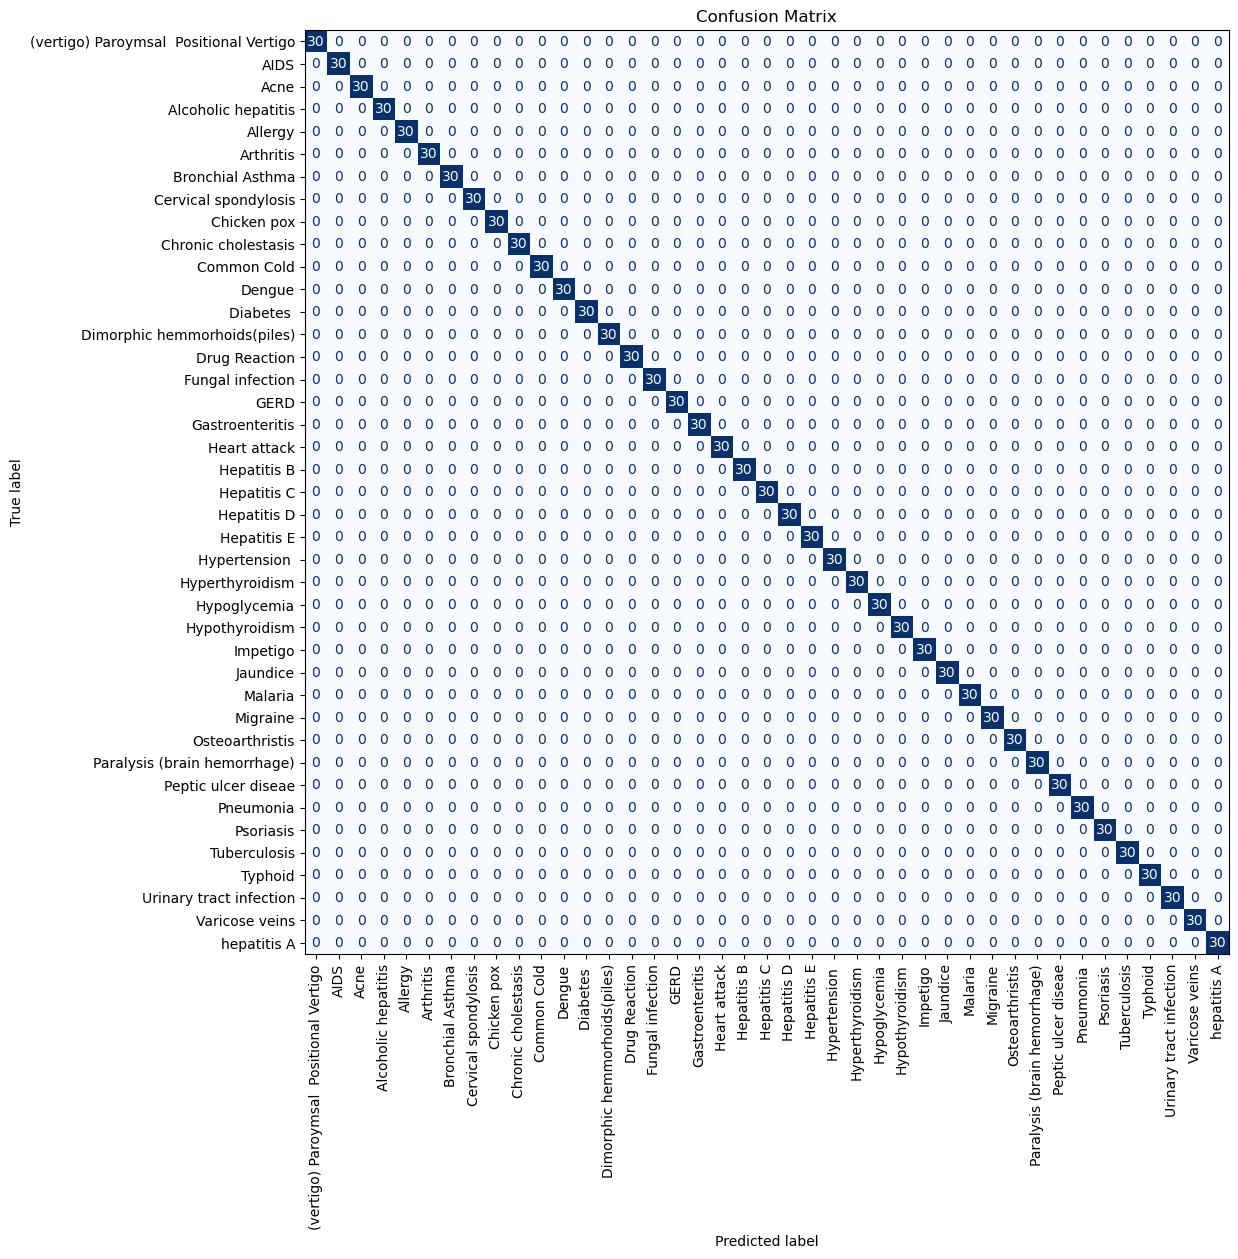

In [17]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))

Train Accuracy: 1.0
Test Accuracy: 1.0


In [23]:
user_input = input("Enter symptoms separated by commas: ")
user_symptoms = [s.strip().replace(" ", "_").lower() for s in user_input.split(",")]

input_data = {symptom: 0 for symptom in all_symptoms}
for symptom in user_symptoms:
    if symptom in input_data:
        input_data[symptom] = 1

input_df = pd.DataFrame([input_data])
predicted_disease = model.predict(input_df)[0]
print(f"Predicted Disease: {predicted_disease}")


Enter symptoms separated by commas:  flu, shortbreathingproblem


Predicted Disease: Urinary tract infection
